## PROJECTION STATS NOTEBOOK 📊



══════════════════════════════════════════════════════════════════════════════════════════════════

# MAIN IMPORTS

In [45]:
# top level imports
from pathlib import Path
import os, sys


import napari

### import local python functions in ../infer_subc
sys.path.append(os.path.abspath((os.path.join(os.getcwd(), '..'))))

from infer_subc.core.file_io import (read_czi_image,
                                        export_inferred_organelle,
                                        import_inferred_organelle,
                                        export_tiff,
                                        list_image_files)

from infer_subc.core.img import *
from infer_subc.utils.stats import *
from infer_subc.utils.stats import _assert_uint16_labels
from infer_subc.utils.stats_helpers import *
from infer_subc.organelles import *
from infer_subc.constants import (TEST_IMG_N,
                                    NUC_CH ,
                                    LYSO_CH ,
                                    MITO_CH ,
                                    GOLGI_CH ,
                                    PEROX_CH ,
                                    ER_CH ,
                                    LD_CH ,
                                    RESIDUAL_CH )   

import time
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# this will be the example image for testing the pipeline below
test_img_n = 1

test_org = 5

number_of_bins = 5

bin = 4

# This is because the napari output names made it difficult for the functions to open them
unique_name = "20230606_testnrm_"

In [47]:
# build the datapath
# all the imaging data goes here.
data_root_path = Path("C:/Users/redre/Documents/CohenLab/MSI-3D-analysis/20230606_test_files_practice_analysis")

# linearly unmixed ".czi" files are here
in_data_path = data_root_path / "test_files"
im_type = ".czi"

# get the list of all files
img_file_list = list_image_files(in_data_path,im_type)
test_img_name = img_file_list[test_img_n]

# save output ".tiff" files here
out_data_path = data_root_path / "20230606_out"

if not Path.exists(out_data_path):
    Path.mkdir(out_data_path)
    print(f"making {out_data_path}")

In [48]:
test_img_name

WindowsPath('C:/Users/redre/Documents/CohenLab/MSI-3D-analysis/20230606_test_files_practice_analysis/test_files/24hrs-Ctrl +oleicAcid 50uM_3_Unmixing.czi')

In [49]:
img_data,meta_dict = read_czi_image(test_img_name)

# get some top-level info about the RAW data
channel_names = meta_dict['name']
img = meta_dict['metadata']['aicsimage']
scale = meta_dict['scale']
channel_axis = meta_dict['channel_axis']

source_file = meta_dict['file_name']

c:\Users\redre\anaconda3\envs\infer-subc-ngudi\lib\site-packages\ome_types\_convenience.py:112: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


In [50]:
tiff_outputs = []
out_list = list_image_files(out_data_path,"tiff")
for pat in out_list:
    if str(pat.stem).startswith(str(source_file.stem)):
        tiff_outputs.append(str(pat.stem))

tiff_outputs[0].endswith("cell")

True

In [51]:
source_file.stem

'24hrs-Ctrl +oleicAcid 50uM_3_Unmixing'

In [52]:
viewer = napari.Viewer()

HERE IS THE IMAGE

In [53]:
viewer.add_image(img_data,scale=scale)

<Image layer 'img_data' at 0x2b426aae3e0>

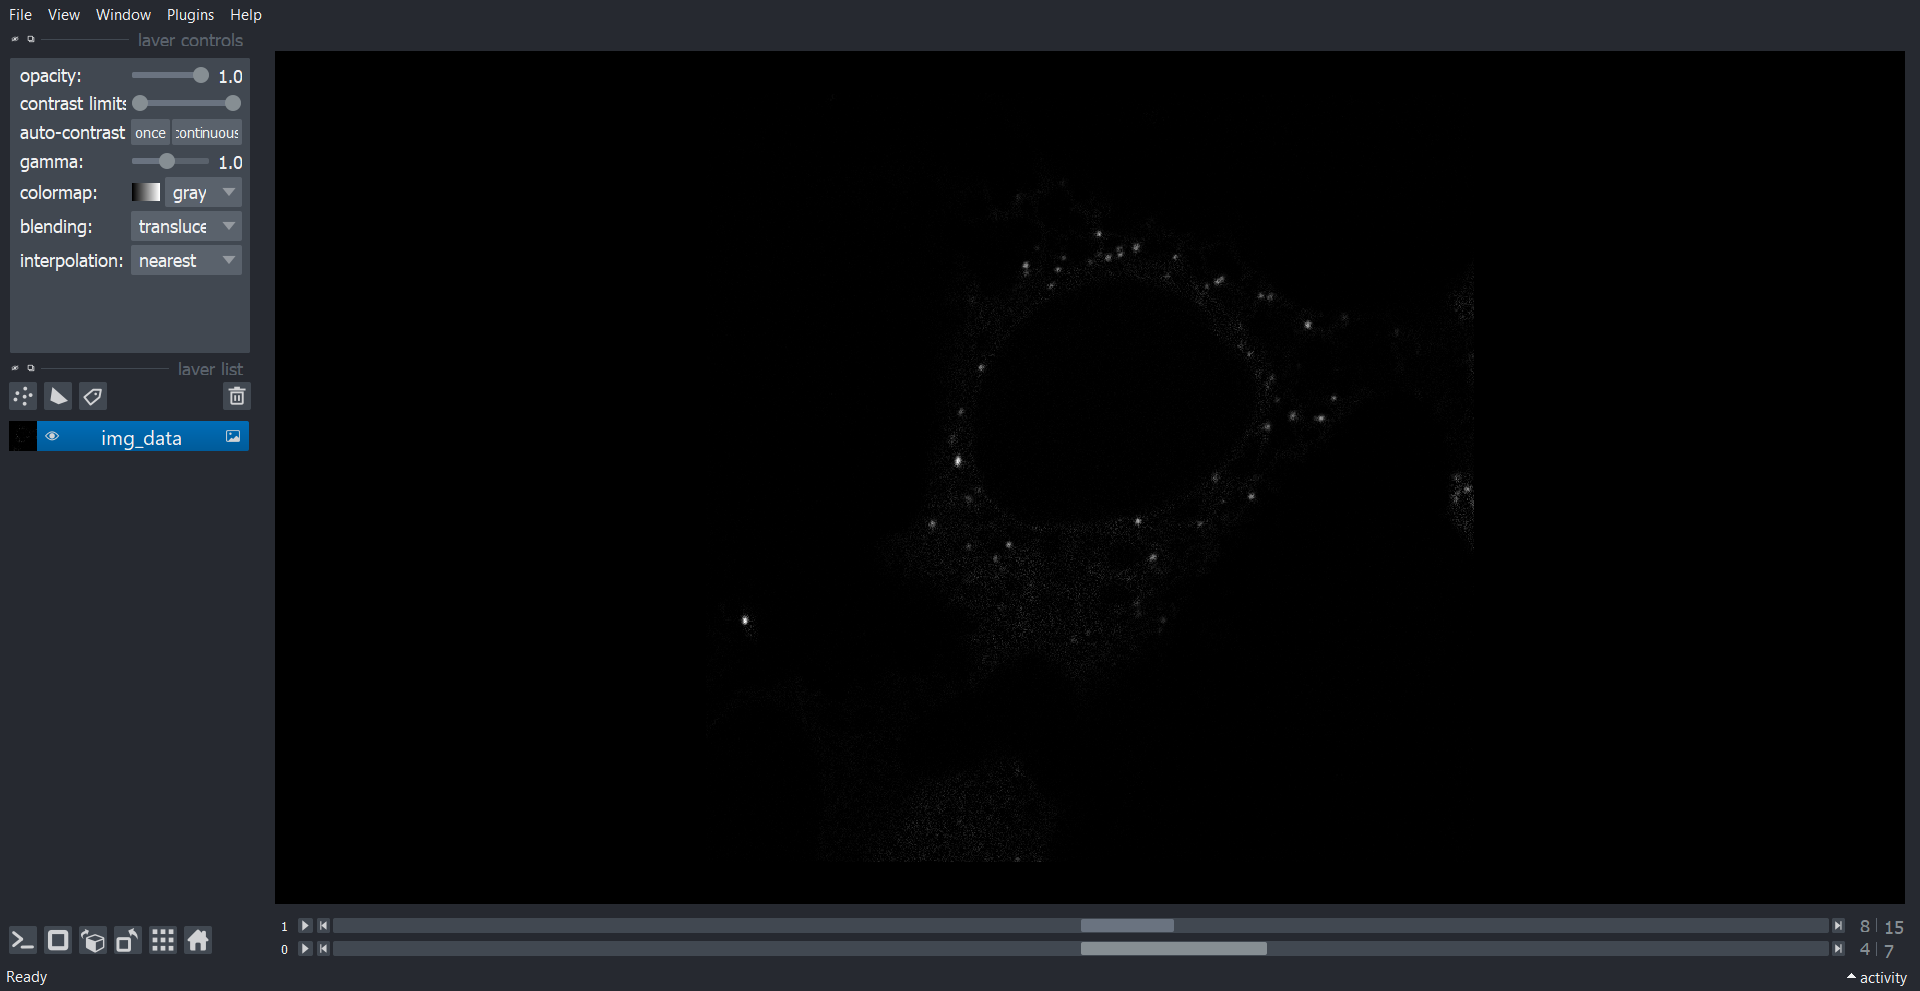

In [54]:
from napari.utils.notebook_display import nbscreenshot

nbscreenshot(viewer, canvas_only=False)

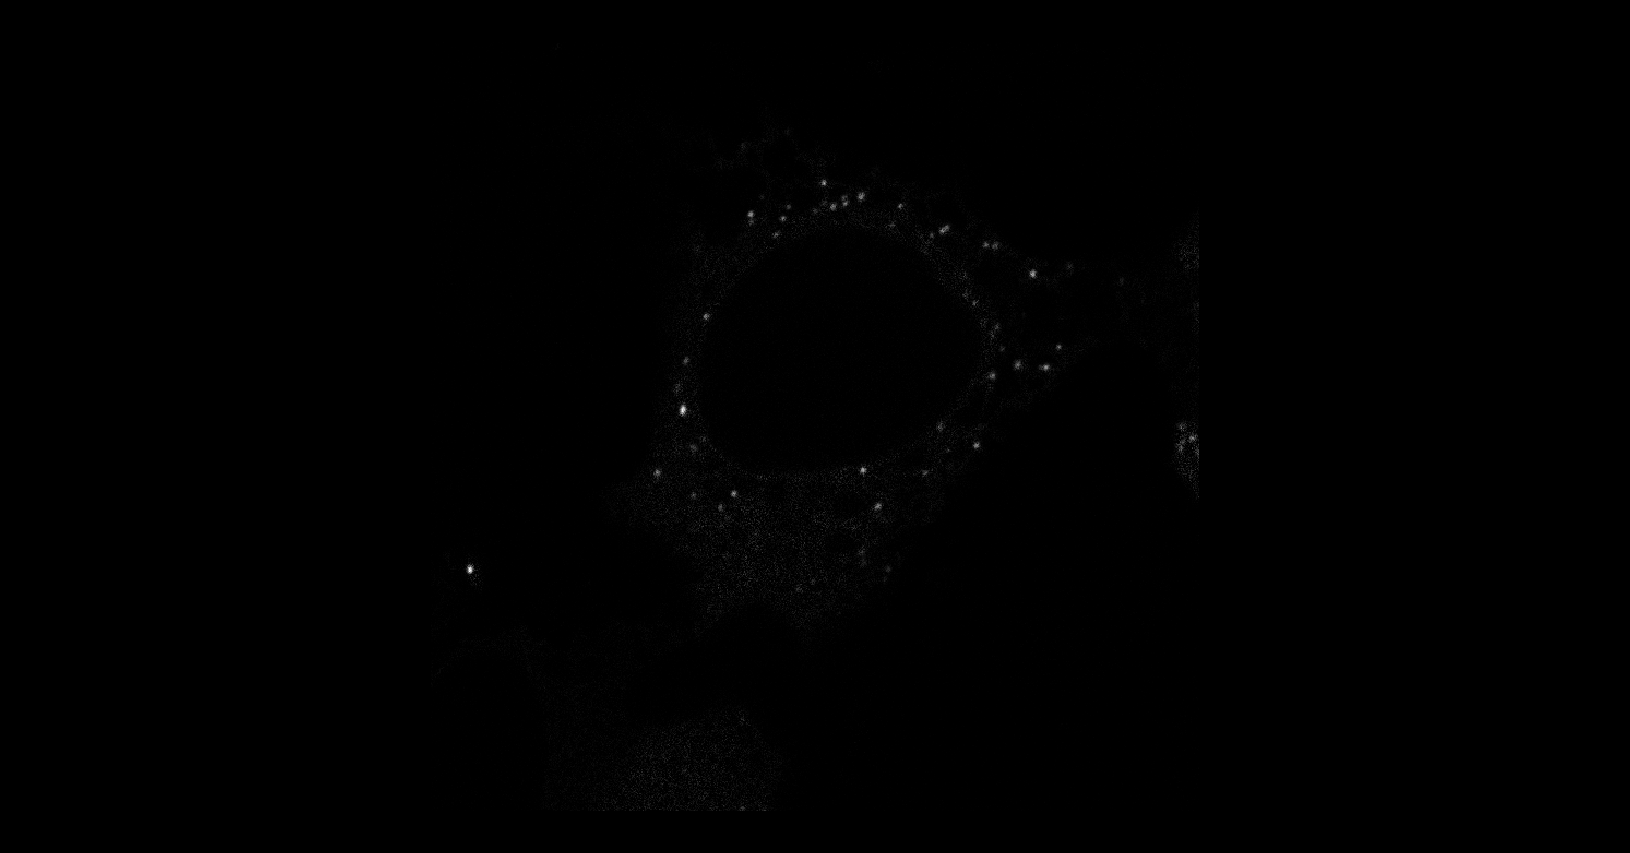

In [55]:
nbscreenshot(viewer, canvas_only=True)

Retrieving the objects

In [56]:
nuclei_obj =  import_inferred_organelle("20230606_testnrm_nuc",meta_dict,out_data_path)
cellmask_obj = import_inferred_organelle("20230606_testnrm_cell",meta_dict,out_data_path)
cyto_mask = import_inferred_organelle("20230606_testnrm_cyto",meta_dict,out_data_path)

loaded  inferred 3D `20230606_testnrm_nuc`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_cell`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_cyto`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 


Getting the masks and the intensities

In [59]:
organelle_names = ["nuc","lyso", "mito","golgi","perox","ER","LD"]

# Get nuclei was rewritten because we have to maintain the same order and number of organelles to make everything run smoothly

organelle_masks = []
for name in organelle_names:
    organelle_masks.append(import_inferred_organelle((f'{unique_name}{name}'),meta_dict,out_data_path))
organelle_channels = [NUC_CH,
                      LYSO_CH,
                      MITO_CH,
                      GOLGI_CH,
                      PEROX_CH,
                      ER_CH,
                      LD_CH]

original_intensities = []
for chan in organelle_channels:
    original_intensities.append(img_data[chan])


loaded  inferred 3D `20230606_testnrm_nuc`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_lyso`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_mito`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_golgi`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_perox`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_ER`  from C:\Users\redre\Documents\CohenLab\MSI-3D-analysis\20230606_test_files_practice_analysis\20230606_out 
loaded  inferred 3D `20230606_testnrm_LD`  from C:\Users\redre\Documents\CohenLab\MSI-3D-

INPUTS FOR THE RADIAL STATS FUNCTION

In [64]:
stacky = np.zeros_like(organelle_masks[0])
for masks in organelle_masks:
    stacky += masks.astype(bool)
np.unique(stacky)

array([0, 1, 2, 3, 4], dtype=uint16)

In [71]:
viewer.add_image(apply_mask(stacky > 1,cellmask_obj),scale=scale)
viewer.add_image(apply_mask(stacky > 2,cellmask_obj),scale=scale)
viewer.add_image(apply_mask(stacky > 3,cellmask_obj),scale=scale)

<Image layer 'Image [5]' at 0x2b43fedd6f0>

In [9]:
# args 
cellmask_obj
nuclei_obj
organelle_mask = cyto_mask
organelle_name = organelle_names[test_org]
org_obj = organelle_masks[test_org]
org_img = original_intensities[test_org]

n_rad_bins = number_of_bins
n_zernike = 9

target = organelle_name


In [ ]:
def get_radial_stats(        
        cellmask_obj: np.ndarray,
        organelle_mask: np.ndarray,
        organelle_obj:np.ndarray,
        organelle_img: np.ndarray,
        organelle_name: str,
        nuclei_obj: np.ndarray,
        n_rad_bins: Union[int,None] = None,
        n_zernike: Union[int,None] = None,
        ):

    """
    Params


    Returns
    -----------
    rstats table of radial distributions
    zstats table of zernike magnitudes and phases
    rad_bins image of the rstats bins over the cellmask_obj 

    """


    # flattened
    cellmask_proj = create_masked_Z_projection(cellmask_obj)
    org_proj = create_masked_Z_projection(organelle_obj,organelle_mask.astype(bool))
    img_proj = create_masked_Z_projection(organelle_img,organelle_mask.astype(bool), to_bool=False)

    nucleus_proj = create_masked_Z_projection(nuclei_obj,cellmask_obj.astype(bool)) 

    radial_stats, radial_bin_mask = get_radial_distribution(cellmask_proj=cellmask_proj, 
                                                            org_proj=org_proj, 
                                                            img_proj=img_proj, 
                                                            org_name=organelle_name, 
                                                            nucleus_proj=nucleus_proj, 
                                                            n_bins=n_rad_bins
                                                            )
    
    zernike_stats = get_zernike_stats(
                                      cellmask_proj=cellmask_proj, 
                                      org_proj=org_proj, 
                                      img_proj=img_proj, 
                                      organelle_name=organelle_name, 
                                      nucleus_proj=nucleus_proj, 
                                      zernike_degree = n_zernike
                                      )

    return radial_stats,zernike_stats,radial_bin_mask

BROKEN DOWN GET RADIAL DISTRIBUTION FUNCTION

### INPUTS

In [ ]:
### Establishes the total area of the cellmask
cellmask_proj = create_masked_Z_projection(cellmask_obj)

# Changed the mask to cellmask
# Establishes the lysosome object projection as the organelle projection
org_proj = create_masked_Z_projection(org_obj,cellmask_obj)

# Changed the mask to cellmask
# Establishes the lysosome image projection for the intensities, changed to_bool to False
## When it had its default value it stacked whether there was signal or not, which weighs heavy and light signal evenly, which is not right
img_proj = create_masked_Z_projection(org_img,cellmask_obj,to_bool=False)

# The name of the organelle being measured in the projection stats
org_name = organelle_names[test_org]

# The nucleus projections
nucleus_proj = create_masked_Z_projection(nuclei_obj,cellmask_obj)

# The number of bins
n_bins = 5

# If the bins propogate from the edges 
from_edges = True

In [ ]:
org_name

In [ ]:
viewer = napari.Viewer()

In [ ]:
viewer.add_image(cellmask_proj)
nbscreenshot(viewer, canvas_only=True)

How white a pixel is represents how many Z's where part of the cellmask in that (x,y)

In [ ]:
viewer.add_image(org_proj)
nbscreenshot(viewer, canvas_only=True)

How white a pixel is represents how many Z's where part of the lysosome in that (x,y)

In [ ]:
if np.max(img_proj) > 2**16:
     m = np.max(img_proj)
     for_nap = (img_proj / m) * 2**16
     viewer.add_image(for_nap.astype(int))
else:
     viewer.add_image(img_proj)
nbscreenshot(viewer, canvas_only=True)

The intensities summed on the Z axis, remember that this was masked earlier

In [ ]:
viewer.add_image(nucleus_proj)
nbscreenshot(viewer, canvas_only=True)

How white a pixel is represents how many Z's where part of the nucleus in that (x,y)

In [ ]:
# Sets the amount of bins to a default of 5 if there is an issue with the value
bin_count = n_bins if n_bins is not None else 5
# The number of objects
nobjects = 1
# Im pretty sure this does not matter
### scale_bins = True
# Whether to count things within the nuclei mask
keep_nuc_bins = True

# Whether to propogate from the edge of the cell or center of the nucleus (This is subject to change)
center_on_nuc = False

# Converting the nucleus_proj to a nucleus proj mask
center_objects = nucleus_proj>0

In [ ]:
viewer.add_image(center_objects)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
np.unique(center_objects)

In [ ]:
# Converts the cellmask projection to a masks of 0s and 1s
labels = (cellmask_proj>0).astype(np.uint16)
viewer.add_image(labels)

nbscreenshot(viewer, canvas_only=True)

In [ ]:
normalized_distance, good_mask, i_center, j_center = get_normalized_distance_and_mask(labels, center_objects, center_on_nuc, keep_nuc_bins)

In [ ]:
# So normalized distnace it how far each cell is from the nucleus of the cell
(normalized_distance * 255)
viewer.add_image((normalized_distance * 255),colormap="gist_earth")

nbscreenshot(viewer, canvas_only=True)

Extracting i and j center (they are array with the same spots filled in as the cellmask projection but have two distinct numbers at the items)

In [ ]:
ic = int(max(np.unique(i_center)))
jc = int(max(np.unique(j_center)))
ic,jc


In [ ]:
# Creating a box to see if the i,j centers are the coordinates for the center of the nucleus
box_size = 10
redbox_array = []
row_counter = -1
for row in np.zeros_like(cellmask_proj):
    row_counter += 1
    n_row = []
    col_counter = -1
    for col_item in row:
        x = 0
        col_counter += 1
        if row_counter >= (ic - box_size/2) and row_counter <= (ic + box_size/2):
            if col_counter >= (jc - box_size/2) and col_counter <= (jc + box_size/2):
                x = 1
        n_row.append(x)
    redbox_array.append(n_row)
redbox_array = np.array(redbox_array,dtype = bool)         
viewer.add_image(redbox_array)

In [ ]:
viewer.add_image(normalized_distance)
viewer.add_image(redbox_array,blending="additive",colormap="red")
nbscreenshot(viewer, canvas_only=True)

confirms i and j center are the coordinates for the center of the nucleus

In [ ]:
viewer.add_image(good_mask)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
if np.all(good_mask == labels):
    print("good_mask is identical to labels")
else:
    print("good_mask and labels are different, I just do not know what the difference is")

See? theres a little humor in code

In [ ]:
if normalized_distance is None:
        print('WTF!!  normailzed_distance returned wrong')

In [ ]:
# ngood_pixels is the amount of pixels the cellmask_object cover after a z projection, the two dimensional pixel area of the cellmask projection
ngood_pixels = np.sum(good_mask)

In [ ]:
# It's only keeping the True pixels
good_labels = labels[good_mask]

In [ ]:
np.unique(good_labels)

In [ ]:
### This is my proposed change to the code to prevent the first bin from being combined with the nucleus, while maintaining the same amount of bins
# bin_indexes = (normalized_distance * bin_count).astype(int)

# For the exterior bins
bin_indexes = ((normalized_distance * (bin_count - 1)) + 1).astype(int)

bin_indexes[~good_mask] = 0

# For the nucleus bin
bin_indexes[center_objects] = 0

In [ ]:
viewer.add_image(bin_indexes, colormap="gist_earth")
nbscreenshot(viewer, canvas_only=True)

In [ ]:
fourdim_bins = []
for bin in range(bin_count):
    bin_image_2d = bin_indexes == bin
    bin_image_2d = apply_mask(bin_image_2d, good_mask)
    bin_image_4d = np.tile(bin_image_2d, (img_data.shape[0],img_data.shape[1],1,1))
    fourdim_bins.append(bin_image_4d)
fourdim_bins = np.array(fourdim_bins)

In [ ]:
fourdim_bins.shape

In [ ]:
img_data.shape

In [ ]:
colors = ["gray","bop orange","yellow","green","blue"]
for bin in range(bin_count):
    viewer.add_image(img_data * fourdim_bins[bin],colormap=colors[bin],blending="additive",scale=scale,contrast_limits=([0, 10000]))


In [ ]:
nbscreenshot(viewer, canvas_only=True)

This is the ER of the cell, overlayed with the bins it will be placed into

In [ ]:
np.unique(bin_indexes)

In [ ]:
# A safeguard, I belive nothing changes here
bin_indexes[bin_indexes > bin_count] = bin_count

In [ ]:
# This code takes in all of the pixels that are in the cellmask projection region and turning them into 0s (item 0)
# Takes in all the pixels that are in the cellmask projection and their bin label (item 1)
labels_and_bins = (good_labels - 1, bin_indexes[good_mask])

In [ ]:
# This is the number of voxels as confirmed below, I still dont know how tf this works
# Remember that cellmask projections has the number of how many z existed at each pixel, so the sum is the amount of voxels in the cellmask
histogram_cmsk = coo_matrix( (cellmask_proj[good_mask], labels_and_bins), shape=(nobjects, bin_count) ).toarray()

In [ ]:
# That means his code includes the nuclei in bin1
histogram_cmsk

Checking if the sum is consistent

In [ ]:
np.sum(histogram_cmsk),np.sum(cellmask_obj)

In [ ]:
# Checking if the voxel numbers are consistent by indexing the cellmask projections by the 2 dimensional bins
for i in range(bin_count):
    print(np.sum(cellmask_proj[fourdim_bins[i][0][0]]))

In [ ]:
# Checking if there is overlap between any of the bins
total = 0
for bin_a in range(bin_count):
    for bin_b in range(bin_count):
        if bin_a != bin_b:
            a = fourdim_bins[bin_a][0][0]
            b = fourdim_bins[bin_b][0][0]
            total += (np.sum(a & b))

if total == 0:
    print("There is no overlap between any of the bins")
else:
    print("There seems to be overlap between the bins")

In [ ]:
# Using the orgnelle projection this finds the total number of voxels belonging to the organelle in each bin
histogram_org = coo_matrix((org_proj[good_mask],labels_and_bins), shape=(nobjects, bin_count) ).toarray()

In [ ]:
histogram_org

In [ ]:
# For some reason there were objects that were in the nuclear bin that were not masked out, I think there is something up with the infer code
# That is why I had to mask it by the cyto mask
# But the code in the function looks correct
### This was fixed and they are now equal
np.sum(histogram_org),np.sum(apply_mask(organelle_masks[test_org].astype(bool),cellmask_obj))

In [ ]:
histogram_img = coo_matrix((img_proj[good_mask],labels_and_bins), shape=(nobjects, bin_count) ).toarray()

In [ ]:
histogram_img

In [ ]:
np.sum(histogram_img), np.sum(apply_mask(original_intensities[test_org], cellmask_obj))

In [ ]:
# This was also changed
# bin_indexes = (normalized_distance * bin_count).astype(int
x_bin_indexes = ((normalized_distance * (bin_count - 1)) + 1)

x_bin_indexes[~good_mask] = 0

x_bin_indexes[center_objects] = 0

bin_indexes = x_bin_indexes.astype(int)

In [ ]:
sum_by_object_cmsk = np.sum(histogram_cmsk,1)

In [ ]:
# This is the same sum I checked earlier, The total cellmask volume (in voxels)
sum_by_object_cmsk

In [ ]:
sum_by_object_org = np.sum(histogram_org, 1)

In [ ]:
# The total volume (in voxels) of the organelle objects
sum_by_object_org

In [ ]:
# The total intensity within the cellmask in the organelle 3D image
sum_by_object_img = np.sum(histogram_img, 1)

In [ ]:
sum_by_object_img

In [ ]:
number_at_distance = coo_matrix(( np.ones(ngood_pixels), labels_and_bins), (nobjects, bin_count)).toarray()

In [ ]:
# In two dimensional space, how many pixels each bin was composed of (area in pixels)
# This could be normalized using the first two numbers in the scale because they correlate to x and y (it is in a z projection)
number_at_distance

In [ ]:
np.sum(number_at_distance),np.sum(good_mask)

In [ ]:
# This code just futher confirms it
sum_by_object = np.sum(number_at_distance, 1)

In [ ]:
# This is the sum of the pixels (or the area) in the z projection of the cell
sum_by_object

In [ ]:
# Quite litterally just stacks the items in the array by the number of bins
sum_by_object_per_bin = np.dstack([sum_by_object] * (bin_count))[0]

In [ ]:
sum_by_object_per_bin

In [ ]:
# For each bin the percentage of the Z projection area at each bin takes up, This is not the perecentage of the cellmask volume because,
# The shape of the cell is not constant in the Z axis
fraction_at_bin = number_at_distance / sum_by_object_per_bin 

In [ ]:
fraction_at_bin

In [ ]:
# i is a veritcal gradient and j is a horizontal gradient
i, j = np.mgrid[0 : labels.shape[0], 0 : labels.shape[1]]

In [ ]:
viewer = napari.Viewer()

In [ ]:
viewer.add_image(i)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
viewer.add_image(j)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
# imask is a boolean array, which has an item for each pixel in the good mask (because it was indexed by it)
# The value depends of if at that pixel in the good mask, was the row number in the i gradient larger than the i_center number (i_center)
# is any array filled with the same number, which is the x coordinate of the center of the nucleus.
imask = i[good_mask] > i_center[good_mask]

In [ ]:
# Same thing but for the columns
jmask = j[good_mask] > j_center[good_mask]

In [ ]:
# The absolute distance of the i masks compared to the absolute distance of the j masks
absmask = abs(i[good_mask] - i_center[good_mask]) > abs(
        j[good_mask] - j_center[good_mask]
    )

In [ ]:
# splits the good_mask into 8 equal bins
radial_index = (
        imask.astype(int) + jmask.astype(int) * 2 + absmask.astype(int) * 4
    )

In [ ]:
radial_index

In [ ]:
# code to see what radial_index looks like
radial_index_test = []
counter = -1
for row in range(len(good_mask)):
    new_row = []
    for col in range(len(good_mask[0])):
        if good_mask[row][col] == True:
            counter += 1
            new_row.append(radial_index[counter])
        else:
            new_row.append(0)
    radial_index_test.append(new_row)
radial_index_test = np.array(radial_index_test)


In [ ]:
radial_index_test[good_mask] + 0

In [ ]:
viewer.add_image(radial_index_test)
viewer.add_labels(radial_index_test)
nbscreenshot(viewer, canvas_only=True)

So here is how the CV is calculated. So in each wedge you get the mean and then from those means you can determine the standard deviation. The coefficient of variation is that standard deviation over the mean of wedges.

In [ ]:
# establishing empty bins
statistics = []
stat_names =[]
cv_cmsk = []
cv_obj = []
cv_img = []

Lets do this for the nucleus bin

# FOR LOOP

In [ ]:
# retrieves the bin_mask by doing a logical and
bin_mask = good_mask & (bin_indexes == bin)

In [ ]:
viewer.add_image(bin_mask)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
# The number of pixels in the bin
bin_pixels = np.sum(bin_mask)
print(bin_pixels)

In [ ]:
# an array of trues with the same total as the cell before
bin_labels = labels[bin_mask]

In [ ]:
bin_labels, sum(bin_labels)

In [ ]:
# The radial index but in the shape of the bin
bin_radial_index = radial_index[bin_indexes[good_mask] == bin]

In [ ]:
np.unique(bin_radial_index)

In [ ]:
# code to see what bin_radial_index looks like
bin_radial_index_test = []
counter = -1
for row in range(len(bin_mask)):
    new_row = []
    for col in range(len(bin_mask[0])):
        if bin_mask[row][col] == True:
            counter += 1
            new_row.append(bin_radial_index[counter])
        else:
            new_row.append(0)
    bin_radial_index_test.append(new_row)
bin_radial_index_test = np.array(bin_radial_index_test)

In [ ]:
viewer.add_image(bin_radial_index_test)
viewer.add_labels(bin_radial_index_test)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
# Similar code to last time, takes the arrays of 1s and makes them 0s and the second item is an array with the pixels and the label
# corresponding to the wedge it is in
labels_and_radii = (bin_labels - 1, bin_radial_index)

In [ ]:
labels_and_radii

In [ ]:
# How many pixels are in each wedge
pixel_count = coo_matrix( (np.ones(bin_pixels), labels_and_radii), (nobjects, 8) ).toarray()
print(pixel_count)

In [ ]:
# Checking if the sum is consistent
np.sum(pixel_count),bin_pixels

In [ ]:
# For each wedge in the bin the amount of voxels within the cellmask
radial_counts_cmsk = coo_matrix( (cellmask_proj[bin_mask], labels_and_radii), (nobjects, 8) ).toarray()
print(radial_counts_cmsk)

In [ ]:
# checking if the sum is consistent
np.sum(radial_counts_cmsk), histogram_cmsk[0,bin]

In [ ]:
# In each wedge how many voxels were there that were part of the organelle (volume of the organelle)
radial_counts = coo_matrix( (org_proj[bin_mask], labels_and_radii), (nobjects, 8) ).toarray()
print(radial_counts)

In [ ]:
# checking if the sum us consistent
np.sum(radial_counts), histogram_org[0,bin]

In [ ]:
# In each wedge the sum of the intensities in each bin
radial_values = coo_matrix( (img_proj[bin_mask], labels_and_radii), (nobjects, 8) ).toarray()
print(radial_values)

In [ ]:
# Ditto
np.sum(radial_values),histogram_img[0,bin]

In [ ]:
# I guess its checking if any of the wedges equal 0
mask = pixel_count == 0

In [ ]:
mask

In [ ]:
# Essentially this is doing a calculation to see how much z you are getting per xy in each wedge
radial_means_cmsk = np.ma.masked_array(radial_counts_cmsk / pixel_count, mask)

In [ ]:
print(radial_counts_cmsk / pixel_count)

In [ ]:
radial_means_cmsk

In [ ]:
# the coefficient of variation calculation, this shows much z varies across the wedge
radial_cv_cmsk = np.std(radial_means_cmsk, 1) / np.mean(radial_means_cmsk, 1)
print(radial_cv_cmsk)

In [ ]:
# I guess its setting the empty values to 0
radial_cv_cmsk[np.sum(~mask, 1) == 0] = 0

In [ ]:
# No changes here
radial_cv_cmsk

In [ ]:
radial_cv_cmsk.mask = np.sum(~mask, 1) == 0

In [ ]:
# No changes, its probably a safeguard
radial_cv_cmsk

In [ ]:
# The amount of organelle voxels in each wedge divided by the pixel count of each wedge
radial_means_obj = np.ma.masked_array(radial_counts / pixel_count, mask)

In [ ]:
radial_means_obj

In [ ]:
# It does the CV calculation with the voxels in each bin divided by the pixel count of each bins
radial_cv_obj = np.std(radial_means_obj, 1) / np.mean(radial_means_obj, 1)
radial_cv_obj[np.sum(~mask, 1) == 0] = 0
radial_cv_obj.mask = np.sum(~mask, 1) == 0

In [ ]:
# I guess it varies a lot in the first bin
radial_cv_obj

In [ ]:
# In this line, the amount of intensity in each wedges is divided by the pixel count. I guess in each calculation the cv provides a number
# that shows the variability within each bin itself
radial_means_img = np.ma.masked_array(radial_values / pixel_count, mask)
print(radial_means_img)


In [ ]:
# same code but for the intensities
radial_cv_img = np.std(radial_means_img, 1) / np.mean(radial_means_img, 1)
radial_cv_img[np.sum(~mask, 1) == 0] = 0
radial_cv_img.mask = np.sum(~mask, 1) == 0
radial_cv_img

In [ ]:
# I'm going to change this to make the name of it nuc_bin
# bin_name = str(bin) if bin > 0 else "Ctr"
if keep_nuc_bins == True:
    bin_name = str(bin) if bin > 0 else "nuc_bin"
else:
    bin_name = str(bin)

In [ ]:
print(bin_name)

In [ ]:
# After each bin is done with the calculations the results will be appended here
stat_names.append(bin_name)
cv_cmsk.append(float(np.mean(radial_cv_cmsk)))  #convert to float to make importing from csv more straightforward
cv_obj.append(float(np.mean(radial_cv_obj)))
# cv_img.append(float(np.mean(radial_cv_obj))) # This was an error
cv_img.append(float(np.mean(radial_cv_img)))

In [ ]:
# This is where the column names come from, and the data is from the functions from earlier

stats_dict={'organelle': org_name,
                'mask': 'cell',
                'radial_n_bins': bin_count,
                'radial_bins': [stat_names],
                'radial_cm_vox_cnt': [histogram_cmsk.squeeze().tolist()],
                'radial_org_vox_cnt': [histogram_org.squeeze().tolist()],
                'radial_org_intensity': [histogram_img.squeeze().tolist()],
                'radial_n_pix': [number_at_distance.squeeze().tolist()],
                'radial_cm_cv':[cv_cmsk],
                'radial_org_cv':[cv_obj],
                'radial_img_cv':[cv_img],
}

In [ ]:
# converts it to a table
stats_tab = pd.DataFrame(stats_dict)
(stats_tab)

Then the stats tab table and the bin_indexes are returned

Now to breakdown get_zernike_stats

# INPUTS

In [ ]:
#Remember that the default value of to bool is True, thus it had to be turned off for the image projection.

# The cellmask projection is the cellmask object 3d array summed on the z
cellmask_proj =  create_masked_Z_projection(cellmask_obj)

# The cellmask projection is the organelle objects 3d array summed on the z
org_proj = create_masked_Z_projection(org_obj,cellmask_obj)

# The orignal czi image (with the specific organelle), with the intensity values summed on the z
img_proj = create_masked_Z_projection(org_img,cellmask_obj,to_bool=False)

# The name of the organelle
organelle_name = organelle_name

# The nucleus projection
nucleus_proj = create_masked_Z_projection(nuclei_obj,cellmask_obj)
        
# zernike_degree: int = 9
# This is fine, im just using the variable but it is the same
zernike_degree = n_zernike


In [ ]:
# Uses a boolean version of the cellmask projection and then labels them, so the output is 0,1 and not bool

labels = label(cellmask_proj>0) #extent as 0,1 rather than bool

In [ ]:
np.unique(labels)

In [ ]:
viewer = np.Viewer()

In [ ]:
viewer.add_image(labels)
viewer.add_labels(labels)
nbscreenshot(viewer, canvas_only=True)

In [ ]:
# The get_zernike_indexes function creates a two dimensional array with the zernike indexes up to the limit
# Notice the pattern, from 0 to the zernike degree the indexes consist of the number modulo 2 and go up in steps of two from then on 
# Until it reaches the number itself
zernike_indexes = centrosome.zernike.get_zernike_indexes(zernike_degree + 1)

In [ ]:
zernike_indexes

In [ ]:
# Uses the labels and the indexes to get the zernike polynomials
z = zernike_polynomial(labels, zernike_indexes)

In [ ]:
print(z)

In [ ]:
z.dtype

In [ ]:
np.unique(z)

In [ ]:
# Each calculation returns the magnitude and phase
z_cm = zernicke_stat(cellmask_proj, z)
z_org = zernicke_stat(org_proj, z)
z_nuc = zernicke_stat(nucleus_proj, z)
z_img = zernicke_stat(img_proj, z)

In [ ]:
z_cm[0]

In [ ]:
z_cm[1]

In [ ]:
# There was an error in the naming of one of the columns

# These are where the column names come from
# nm_labels = [f"{n}_{m}" for (n, m) in (zernike_indexes)
stats_tab = pd.DataFrame({'organelle':organelle_name,
                                'mask':'cell',
                                'zernike_n':[zernike_indexes[:,0].tolist()],
                                'zernike_m':[zernike_indexes[:,1].tolist()],
                                'zernike_cm_mag':[z_cm[0].tolist()],
                                'zernike_cm_phs':[z_cm[1].tolist()],   
                                'zernike_obj_mag':[z_org[0].tolist()],
                                'zernike_obj_phs':[z_org[1].tolist()],
                                'zernike_nuc_mag':[z_nuc[0].tolist()],
                                'zernike_nuc_phs':[z_nuc[1].tolist()],
                                'zernike_img_mag':[z_img[0].tolist()],
                                # 'zernike_img_mag':[z_img[1].tolist()]
                                'zernike_img_phs':[z_img[1].tolist()]}
                                )

In [ ]:
get_zernike_stats(        
        cellmask_proj: np.ndarray,
        org_proj:np.ndarray,
        img_proj: np.ndarray,
        organelle_name: str,
        nucleus_proj: Union[np.ndarray, None] = None,
        zernike_degree: int = 9
        ):

    """
    
    """

    labels = label(cellmask_proj>0) #extent as 0,1 rather than bool
    zernike_indexes = centrosome.zernike.get_zernike_indexes( zernike_degree + 1)


    z = zernike_polynomial(labels, zernike_indexes)

    z_cm = zernicke_stat(cellmask_proj, z)
    z_org = zernicke_stat(org_proj, z)
    z_nuc = zernicke_stat(nucleus_proj, z)
    z_img = zernicke_stat(img_proj, z)

NOW FOR THE DEPTH STATS FUNCTION

# INPUTS

In [15]:
# I changed the order just to stop it from printing
# These are similar inputs to the ones before

cellmask_obj,
organelle_mask,
organelle_name,
nuclei_obj,
organelle_obj = organelle_masks[test_org]
organelle_img = original_intensities[test_org]

In [27]:
# These are not the same projections from before, they are summed on the and x,y axis instead of the z
# The org and img masks were changed to cellmask
cellmask_proj = create_masked_depth_projection(cellmask_obj)
org_proj = create_masked_depth_projection(organelle_obj,cellmask_obj.astype(bool))
img_proj = create_masked_depth_projection(organelle_img,cellmask_obj.astype(bool), to_bool=False)
nucleus_proj = create_masked_depth_projection(nuclei_obj,cellmask_obj.astype(bool)) if nuclei_obj is not None else None

In [22]:
# Creates z bins which have the same number of items as the number of z's where the cell exists
z_bins = [i for i in range(cellmask_obj.shape[0])]

In [26]:
img_proj

array([ 41345488,  66639392, 104925243, 120227946, 159395854, 198195971,
       218348144, 231671867, 251365368, 263090404, 265829662, 262043721,
       235811752, 207809780, 184108176, 101485225], dtype=uint32)

In [23]:
z_bins

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [24]:
# This is where the column names come from
stats_tab = pd.DataFrame({'organelle':organelle_name,
                            'mask':'cell',
                            'n_z':cellmask_obj.shape[0],
                            'z':[z_bins],
                            'z_cm_vox_cnt':[cellmask_proj.tolist()],
                            'z_org_vox_cnt':[org_proj.tolist()],
                            'z_org_intensity':[img_proj.tolist()],
                            'z_nuc_vox_cnt':[nucleus_proj.tolist()]})

In [25]:
stats_tab

,organelle,mask,n_z,z,z_cm_vox_cnt,z_org_vox_cnt,z_org_intensity,z_nuc_vox_cnt
0,ER,cell,16,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[118658, 151337, 153810, 154926, 161384, 16768...","[14, 214, 1897, 5886, 11536, 16552, 20802, 223...","[41345488, 66639392, 104925243, 120227946, 159...","[0, 0, 15248, 35260, 39905, 43239, 44968, 4583..."
